In [ ]:
import csv

state_data = {}

with open('drive/MyDrive/Prevalence of Binge Drinking Among US Adults, 2015.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
      state_data.update({row[0]:row[1]})
del state_data['']

state_data

{'AK': '20',
 'AL': '12.2',
 'AR': '15.2',
 'AZ': '15',
 'CA': '16.7',
 'CO': '18.1',
 'CT': '18.3',
 'DE': '15.8',
 'District of Columbia': '24.4',
 'FL': '17.2',
 'GA': '15.8',
 'HI': '19.8',
 'IA': '21.3',
 'ID': '14.8',
 'IL': '20.8',
 'IN': '16.6',
 'KS': '16.5',
 'KY': '16.1',
 'LA': '18',
 'MA': '18.7',
 'MD': '14.7',
 'ME': '20.2',
 'MI': '19.8',
 'MN': '20.5',
 'MO': '17.7',
 'MS': '12.5',
 'MT': '21.3',
 'NC': '14.6',
 'ND': '24.9',
 'NE': '20.4',
 'NH': '17.8',
 'NJ': '17',
 'NM': '13.6',
 'NV': '14.5',
 'NY': '17.6',
 'OH': '19.5',
 'OK': '13.6',
 'OR': '17.7',
 'PA': '18.5',
 'RI': '17',
 'SC': '16.3',
 'SD': '17.9',
 'TN': '10.9',
 'TX': '16.1',
 'UT': '11.4',
 'VA': '17',
 'VT': '19',
 'WA': '16.6',
 'WI': '24.4',
 'WV': '11.8',
 'WY': '16.9'}

In [ ]:
import matplotlib.pyplot as plt
!pip install geopandas
import geopandas

!git clone https://github.com/joncutrer/geopandas-tutorial.git


fatal: destination path 'geopandas-tutorial' already exists and is not an empty directory.


1950-2018-torn-aspath.zip     usa-states-census-2014.qpj
1950-2018-torn-initpoint.zip  usa-states-census-2014.shp
usa-states-census-2014.cpg    usa-states-census-2014.shp.xml
usa-states-census-2014.dbf    usa-states-census-2014.shx
usa-states-census-2014.prj


/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


Text(0.5, 1.0, 'Motor Accidents vs Prevalence of Binge Drinking in the US')

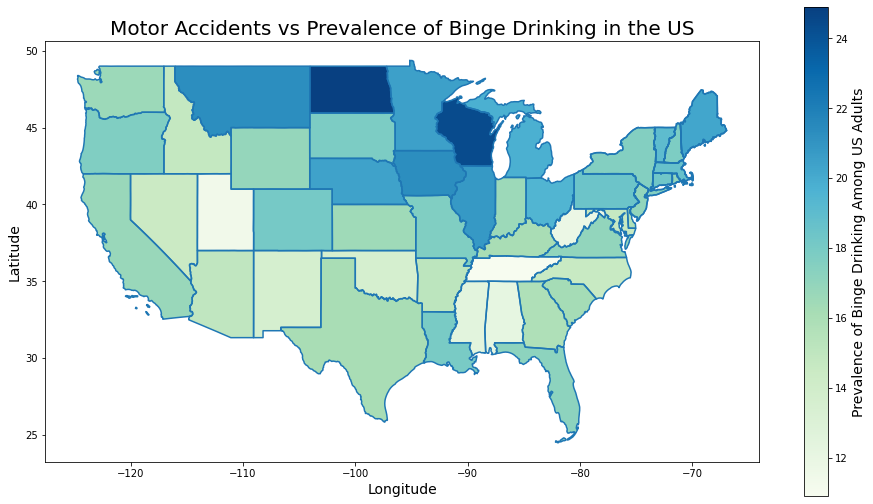

In [ ]:
!ls geopandas-tutorial/data
from math import sqrt
from matplotlib import cm
import matplotlib
import numpy as np

MAX_VAL, MIN_VAL = max([float(state_data[x]) for x in state_data.keys()]), min([float(state_data[x]) for x in state_data.keys()])

def normalize_color(district):
  n = (float(state_data[district]) - MIN_VAL) / (MAX_VAL - MIN_VAL)
  cmap = matplotlib.cm.get_cmap('GnBu')
  return cmap(n)

fig = plt.figure(1, figsize=(16,9))
ax = fig.add_subplot()

states = geopandas.read_file('geopandas-tutorial/data/usa-states-census-2014.shp')
states = states.to_crs("EPSG:4326")
#type(states)

states.boundary.plot(ax=ax)

for district in state_data.keys():
  state_map = states[states['STUSPS'] == district]
  state_map.plot(ax=ax, color = normalize_color(district))

normal_map = matplotlib.colors.Normalize(vmin=MIN_VAL, vmax=MAX_VAL, clip=False)
cb = fig.colorbar(cm.ScalarMappable(norm=normal_map, cmap='GnBu'), ax=ax)
cb.set_label('Prevalence of Binge Drinking Among US Adults', fontsize=14)

plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

plt.title('Motor Accidents vs Prevalence of Binge Drinking in the US', fontsize=20)

In [ ]:
import zipfile
with zipfile.ZipFile('drive/MyDrive/archive.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
accident_data = []

with open('US_Accidents_Dec20_Updated.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
      if row[2][3] in ['6','7','8']:
        # (lat, long)
        accident_data.append((float(row[4]),float(row[5])))


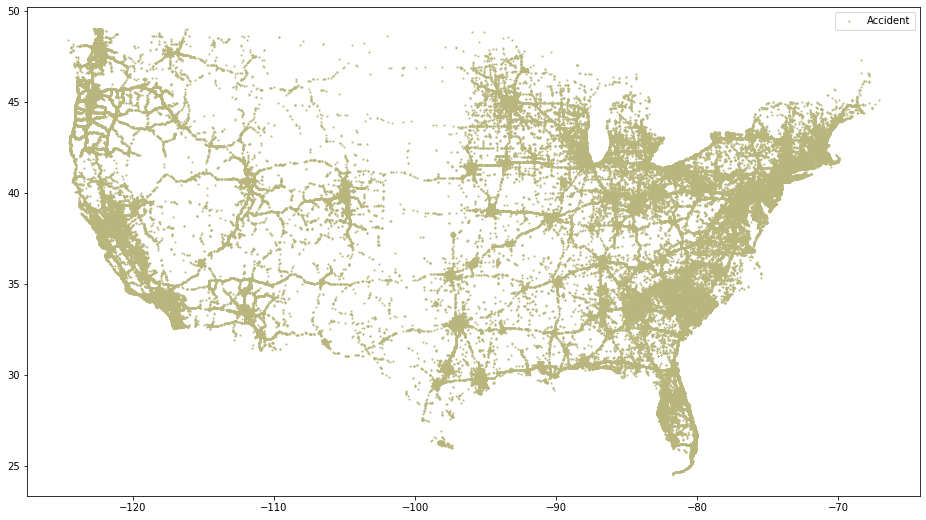

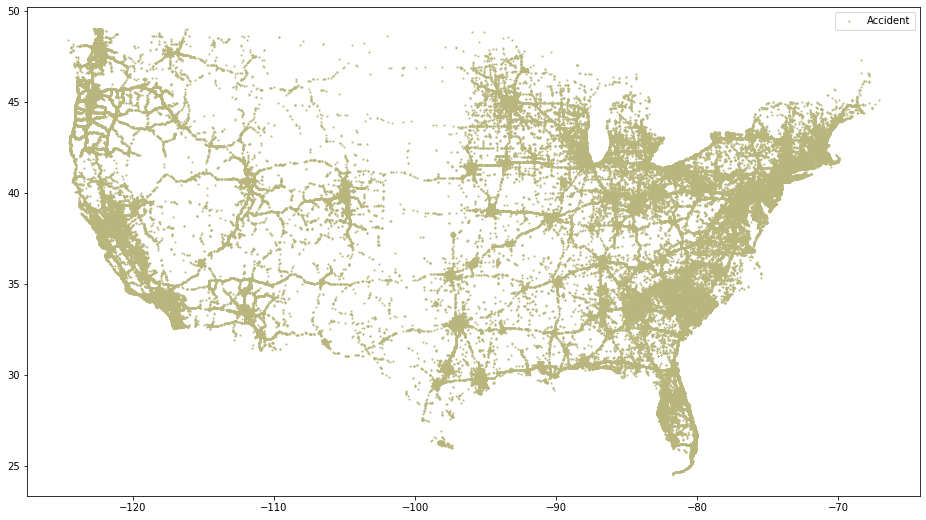

In [ ]:
fig = plt.figure(1, figsize=(16,9))
ax = fig.add_subplot()
ax.scatter([x[1] for x in accident_data], [x[0] for x in accident_data], color='#b8b67d', s=1, label="Accident")
ax.legend()
fig#savefig('geospatial.png', transparent=True, dpi=500)